In [ ]:
# LOAD FUNCTIONS
%run useful_functions.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_t.head()

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio,Població,RFD-mean,RFD-sumw,RFD-std,RFD-sem
0,1,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,5 or 6 days a week,One day a month,1 or 2 days a week,Yes,Yes,166805,51.446154,55.011607,7.426261,2.059674
1,2,8,Nou Barris,6è,Boy,Yes,Intermediate income neighborhoods,11,I live with my family,Yes,...,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week,Yes,I'm not sure,166805,51.446154,55.011607,7.426261,2.059674
2,3,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,1 or 2 days a week,Every day,I'm not sure,Yes,166805,51.446154,55.011607,7.426261,2.059674
3,4,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,Every day,1 or 2 days a week,3 or 4 days a week,Yes,Yes,166805,51.446154,55.011607,7.426261,2.059674
4,5,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,1 or 2 days a week,One day a month,Never or almost never,Yes,Yes,166805,51.446154,55.011607,7.426261,2.059674


## 1. Find relevant columns manually and filter for those:

In [ ]:
rel_col = ['Nom_Districte_Educatiu', 'Codi_Districte_Educatiu', 'ERFDbllp',  # District name, district number, Income in neighbourhood 
           's_ustemps', 's_tempslliure',  # Question 47: Satisfied with use of time, amount of time you have to do what you want
           't_ajuda', 't_cuida', 't_treball', 't_classes', # Question 48: help at home, Take care of siblings/family, work with family, go to class outside school
           't_deures', 't_tv', 't_esport', 't_familia', # Homework/study, watch TV, do sports/exercise, relax/talk/have fun with family
           't_airelliure', 't_xarxes', 't_videojocs', 't_resrepos']  # spend time outdoors, social network, play videogames, do nothing/rest

In [ ]:
time_df = df_t.copy()[rel_col]
time_df.head()

,Nom_Districte_Educatiu,Codi_Districte_Educatiu,ERFDbllp,s_ustemps,s_tempslliure,t_ajuda,t_cuida,t_treball,t_classes,t_deures,t_tv,t_esport,t_familia,t_airelliure,t_xarxes,t_videojocs,t_resrepos
0,Nou Barris,8,Low-income neighborhoods,8,8,5 or 6 days a week,5 or 6 days a week,Never or almost never,1 or 2 days a week,Every day,5 or 6 days a week,5 or 6 days a week,5 or 6 days a week,3 or 4 days a week,5 or 6 days a week,One day a month,1 or 2 days a week
1,Nou Barris,8,Intermediate income neighborhoods,7,10,5 or 6 days a week,One day a month,Never or almost never,1 or 2 days a week,Every day,Every day,1 or 2 days a week,One day a month,One day a month,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week
2,Nou Barris,8,Low-income neighborhoods,10,7,3 or 4 days a week,One day a month,Never or almost never,Never or almost never,Every day,5 or 6 days a week,Every day,Every day,3 or 4 days a week,3 or 4 days a week,1 or 2 days a week,Every day
3,Nou Barris,8,Low-income neighborhoods,10,10,3 or 4 days a week,Every day,Never or almost never,1 or 2 days a week,3 or 4 days a week,5 or 6 days a week,Every day,5 or 6 days a week,3 or 4 days a week,Every day,1 or 2 days a week,3 or 4 days a week
4,Nou Barris,8,Low-income neighborhoods,10,10,Every day,1 or 2 days a week,Every day,Never or almost never,Every day,5 or 6 days a week,One day a month,3 or 4 days a week,3 or 4 days a week,1 or 2 days a week,One day a month,Never or almost never


## Question 47

### Quick overview

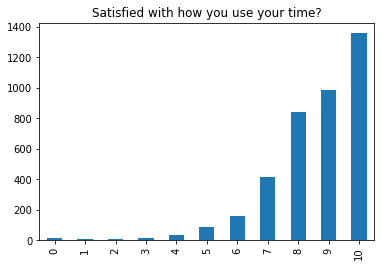

In [ ]:
## Satisfied with use of time
no_NC = time_df['s_ustemps'] != 'NC'
time_df[no_NC].dropna()['s_ustemps'].astype('int').value_counts().sort_index().plot(kind='bar')
plt.title('Satisfied with how you use your time?')
plt.show()

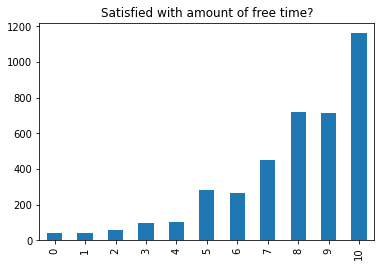

In [ ]:
## Satisfied with amount of free time
no_NC = (time_df['s_tempslliure'] != 'NC')
time_df[no_NC].dropna()['s_tempslliure'].astype('int').value_counts().sort_index().plot(kind='bar')
plt.title('Satisfied with amount of free time?')
plt.show()

### In-depth

In [ ]:
Q47_col = ['Nom_Districte_Educatiu', 'Codi_Districte_Educatiu', 'ERFDbllp', 's_ustemps', 's_tempslliure']
Q47_df = time_df.copy()[Q47_col]
Q47_df.head()

,Nom_Districte_Educatiu,Codi_Districte_Educatiu,ERFDbllp,s_ustemps,s_tempslliure
0,Nou Barris,8,Low-income neighborhoods,8,8
1,Nou Barris,8,Intermediate income neighborhoods,7,10
2,Nou Barris,8,Low-income neighborhoods,10,7
3,Nou Barris,8,Low-income neighborhoods,10,10
4,Nou Barris,8,Low-income neighborhoods,10,10


In [ ]:
f"Unique for s_ustemps {Q47_df['s_ustemps'].unique()}", f"Unique for s_tempslliure {Q47_df['s_tempslliure'].unique()}"

("Unique for s_ustemps ['8' '7' '10' '9' '4' '6' '5' nan '2' '3' '1' 'NC' '0']",
 "Unique for s_tempslliure ['8' '10' '7' '9' '4' '5' '6' '2' '1' nan '3' '0' 'NC']")

### Question 47.1: How satisfied are you with how you use your time?

<AxesSubplot:xlabel='Nom_Districte_Educatiu'>

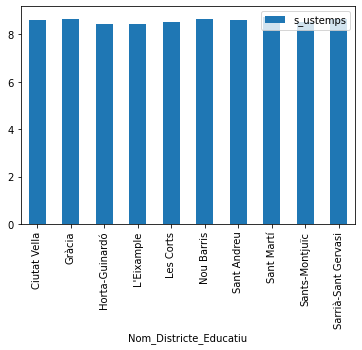

In [ ]:
# Regarding district
Q47_1_district = Q47_df[['Nom_Districte_Educatiu', 's_ustemps']]
no_NC = time_df['s_ustemps'] != 'NC'
Q47_1_district = Q47_1_district[no_NC].dropna()
Q47_1_district['s_ustemps'] = Q47_1_district['s_ustemps'].astype('int')

# Mean of values
Q47_1_district.groupby('Nom_Districte_Educatiu').agg('mean').plot(kind='bar')

In [ ]:
Q47_1_district.groupby('Nom_Districte_Educatiu').agg('mean')

,s_ustemps
Nom_Districte_Educatiu,
Ciutat Vella,8.587079
Gràcia,8.635015
Horta-Guinardó,8.456410
L'Eixample,8.430809
Les Corts,8.524051
Nou Barris,8.651934
Sant Andreu,8.607251
Sant Martí,8.742500
Sants-Montjuïc,8.540682


<AxesSubplot:xlabel='ERFDbllp'>

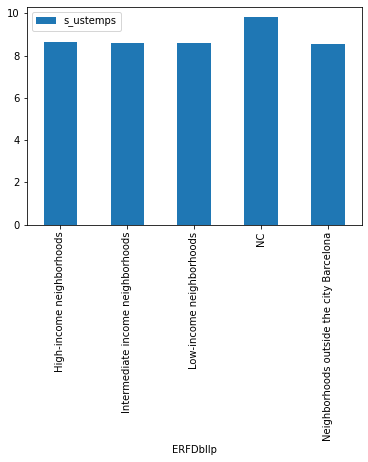

In [ ]:
# Regarding neighbourhood income
Q47_1_income = Q47_df[['ERFDbllp', 's_ustemps']]
no_NC = time_df['s_ustemps'] != 'NC'
Q47_1_income = Q47_1_income[no_NC].dropna()
Q47_1_income['s_ustemps'] = Q47_1_income['s_ustemps'].astype('int')

# Mean of values
Q47_1_income.groupby('ERFDbllp').agg('mean').plot(kind='bar')

In [ ]:
Q47_1_income.groupby('ERFDbllp').agg('mean')

,s_ustemps
ERFDbllp,
High-income neighborhoods,8.618449
Intermediate income neighborhoods,8.598816
Low-income neighborhoods,8.579674
NC,9.800000
Neighborhoods outside the city Barcelona,8.530242


### Question 47.2: How satisfied are you with the amount of free time you have?

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Nom_Districte_Educatiu'>

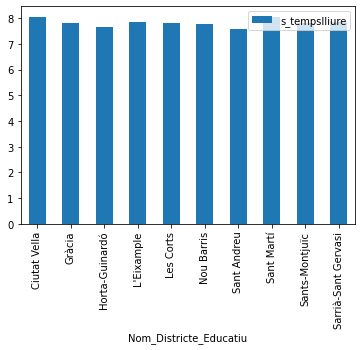

In [ ]:
# Regarding district
Q47_2_district = Q47_df[['Nom_Districte_Educatiu', 's_tempslliure']]
no_NC = time_df['s_tempslliure'] != 'NC'
Q47_2_district = Q47_2_district[no_NC].dropna()
Q47_2_district['s_tempslliure'] = Q47_2_district['s_tempslliure'].astype('int')

# Mean of values
Q47_2_district.groupby('Nom_Districte_Educatiu').agg('mean').plot(kind='bar')

In [ ]:
Q47_2_district.groupby('Nom_Districte_Educatiu').agg('mean')

,s_tempslliure
Nom_Districte_Educatiu,
Ciutat Vella,8.058659
Gràcia,7.824926
Horta-Guinardó,7.673469
L'Eixample,7.852332
Les Corts,7.826196
Nou Barris,7.781768
Sant Andreu,7.601208
Sant Martí,8.057357
Sants-Montjuïc,7.807895


<AxesSubplot:xlabel='ERFDbllp'>

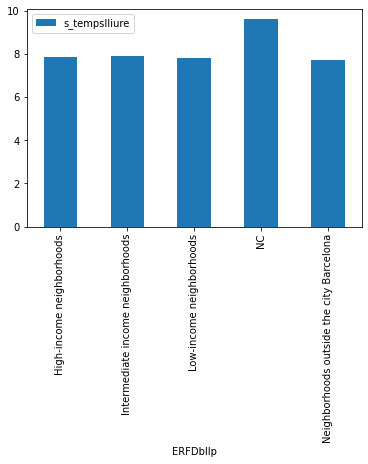

In [ ]:
# Regarding neighbourhood income
Q47_2_income = Q47_df[['ERFDbllp', 's_tempslliure']]
no_NC = time_df['s_tempslliure'] != 'NC'
Q47_2_income = Q47_2_income[no_NC].dropna()
Q47_2_income['s_tempslliure'] = Q47_2_income['s_tempslliure'].astype('int')

# Mean of values
Q47_2_income.groupby('ERFDbllp').agg('mean').plot(kind='bar')

In [ ]:
Q47_2_income.groupby('ERFDbllp').agg('mean')

,s_tempslliure
ERFDbllp,
High-income neighborhoods,7.870021
Intermediate income neighborhoods,7.897493
Low-income neighborhoods,7.809643
NC,9.600000
Neighborhoods outside the city Barcelona,7.724900


## Question 48

In [ ]:
Q48_df = time_df.copy().drop(['s_ustemps', 's_tempslliure'], axis=1)
Q48_df.head(2)

,Nom_Districte_Educatiu,Codi_Districte_Educatiu,ERFDbllp,t_ajuda,t_cuida,t_treball,t_classes,t_deures,t_tv,t_esport,t_familia,t_airelliure,t_xarxes,t_videojocs,t_resrepos
0,Nou Barris,8,Low-income neighborhoods,5 or 6 days a week,5 or 6 days a week,Never or almost never,1 or 2 days a week,Every day,5 or 6 days a week,5 or 6 days a week,5 or 6 days a week,3 or 4 days a week,5 or 6 days a week,One day a month,1 or 2 days a week
1,Nou Barris,8,Intermediate income neighborhoods,5 or 6 days a week,One day a month,Never or almost never,1 or 2 days a week,Every day,Every day,1 or 2 days a week,One day a month,One day a month,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week


In [ ]:
Q48_df['t_ajuda'].unique()

array(['5 or 6 days a week', '3 or 4 days a week', 'Every day',
       '1 or 2 days a week', 'One day a month', 'Never or almost never',
       nan, 'NC'], dtype=object)

### Create function to plot

In [ ]:
def plot_Q48(col: str, groups=['Nom_Districte_Educatiu']):
    assert type(col) == str, "col should be a str"
    
    N = len(groups)
    plt.figure(figsize=(10*N, 7))

    for i, group in enumerate(groups):
        plt.subplot(1, N, i+1)
        district_df = df_t.copy()[[group, col]]
        district_df[col][pd.isna(district_df[col])] = 'NC'  # remove all NaN and make them 'NC'

        # choices = district_df[col].unique()
        choices = ['Every day', '5 or 6 days a week', '3 or 4 days a week', '1 or 2 days a week', 'One day a month', 'Never or almost never', 'NC']

        districts = district_df[group].unique()
        district_count = district_df.groupby(group).count()[col]

        count_dict = pd.Series(district_count.values,index=district_count.index).to_dict()

        barWidth = 0.12  # set width of bars

        bars = {}
        for c in choices:
            counts = []
            choice_filter = (district_df[col] == c)  # filter for choice

            for dis in districts:
                district_filter = (district_df[group] == dis)  # filter for district
                val = district_df[district_filter & choice_filter].count().values[0]
                counts.append(val/count_dict[dis])
            
            bars[c] = counts
        

        # Set position of bar on X axis
        position = {}
        for i, c in enumerate(choices):
            if position.keys():
                idx = list(position.keys())[i-1]
                position[c] = [x + barWidth for x in position[idx]]
            else:
                position[c] = np.arange(len(bars[c]))   

        # Make the plot
        for c in choices:
            plt.bar(position[c], bars[c], width=barWidth, edgecolor='white', label=c)

        # Add xticks on the middle of the group bars
        idx = list(bars.keys())[0]
        plt.xticks([r + 2*barWidth for r in range(len(bars[idx]))], districts, rotation=90)
    

    # Create legend & Show graphic
    plt.legend(bbox_to_anchor=(1, 0.5))

    plt.show()

### Plot Questions

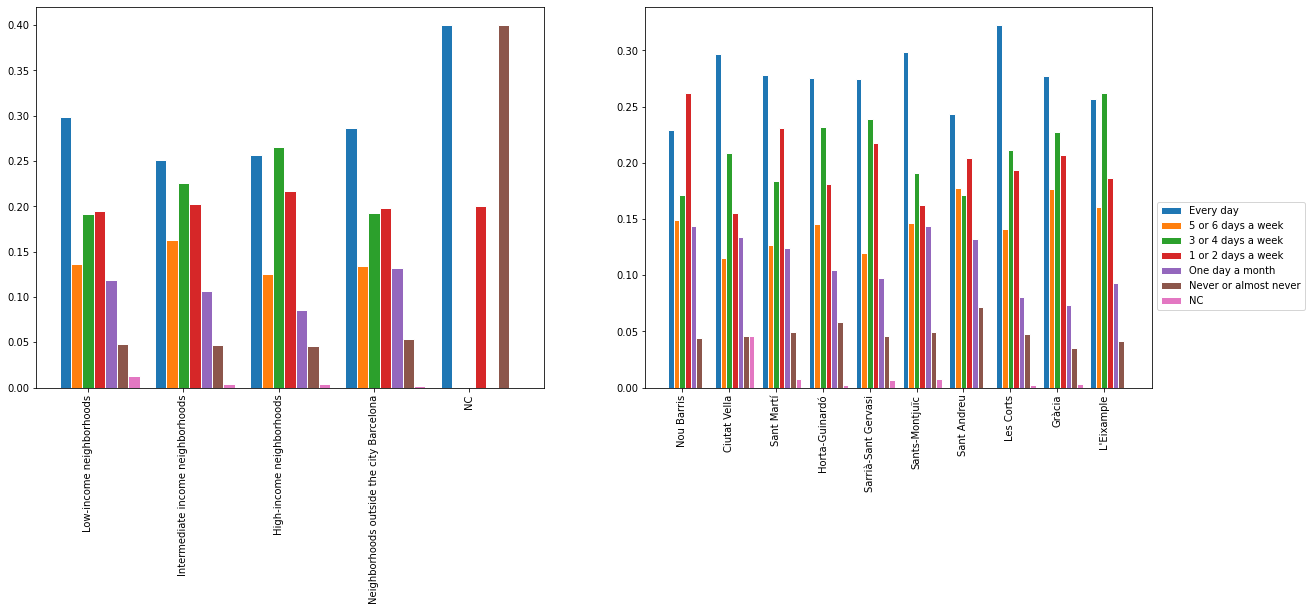

In [ ]:
# Helping at home (housework)
plot_Q48('t_ajuda', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

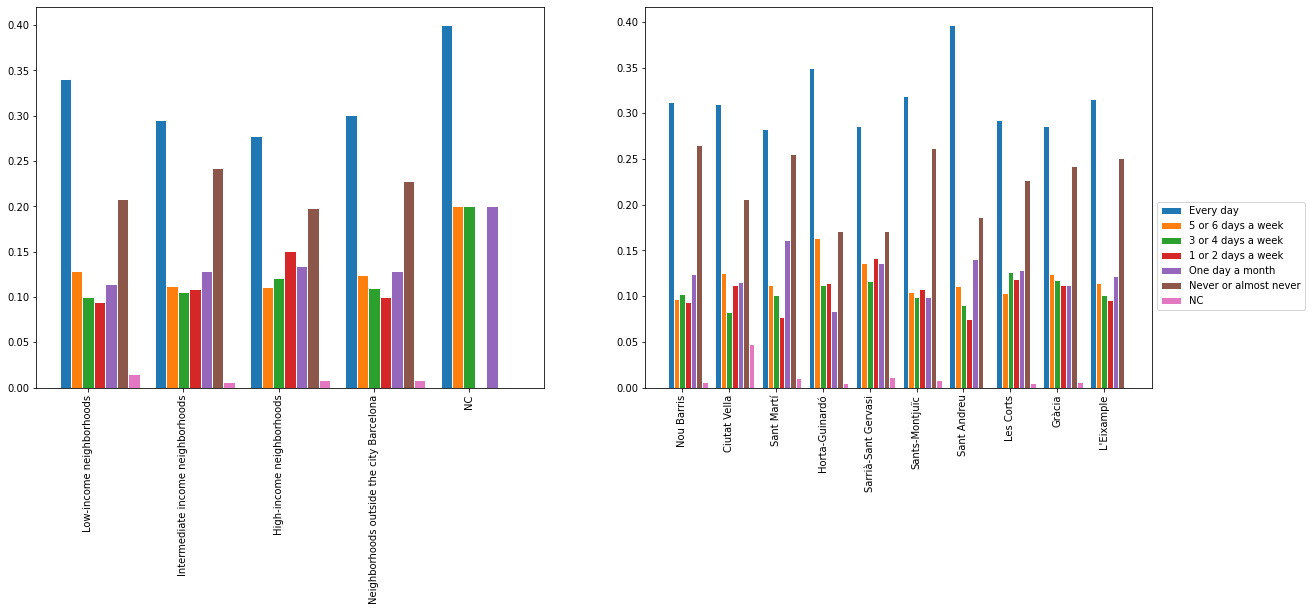

In [ ]:
# Take care of siblings/other members
plot_Q48('t_cuida', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

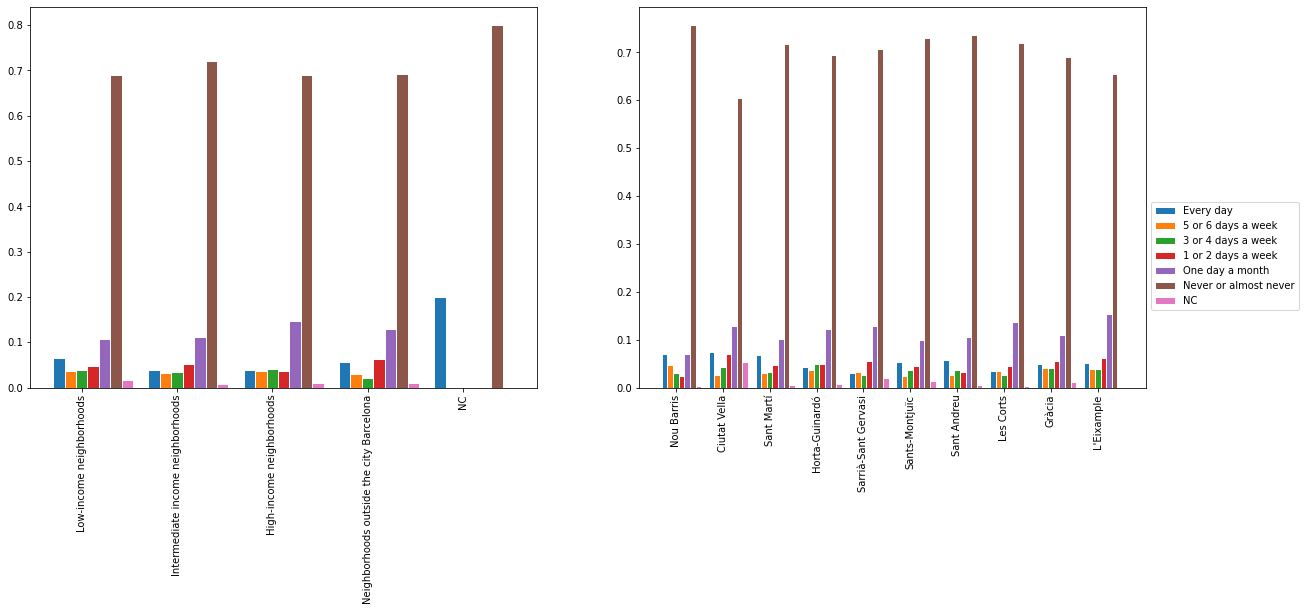

In [ ]:
# Work with family (store/business)
plot_Q48('t_treball', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

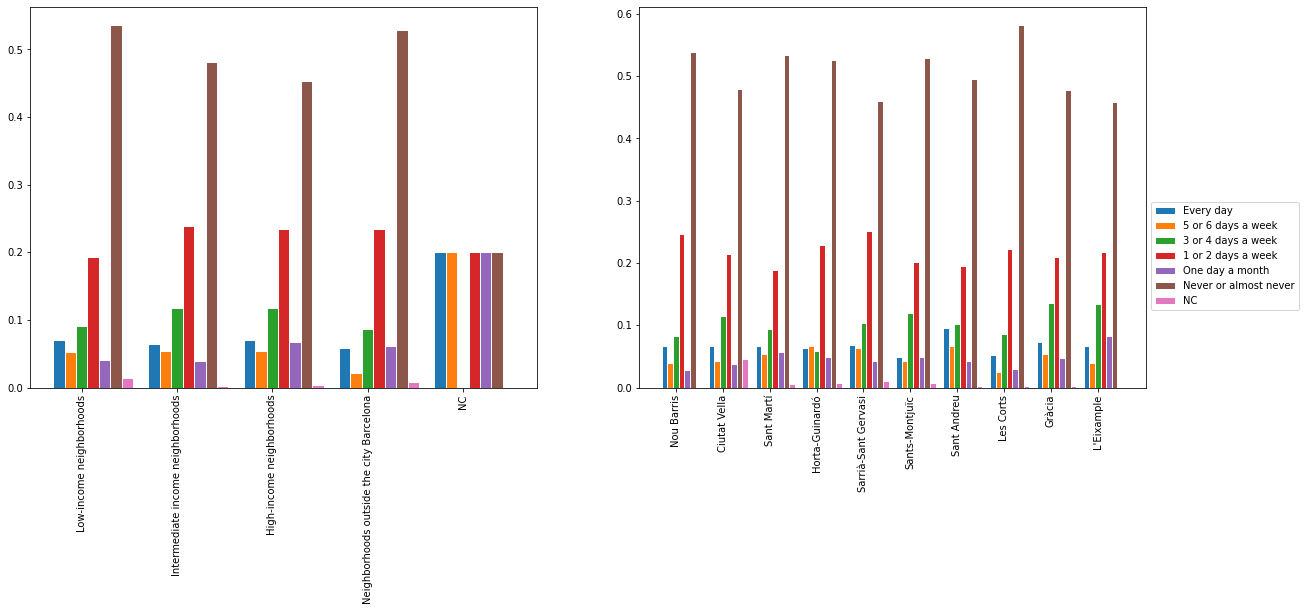

In [ ]:
# Taking classes outside of school
plot_Q48('t_classes', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

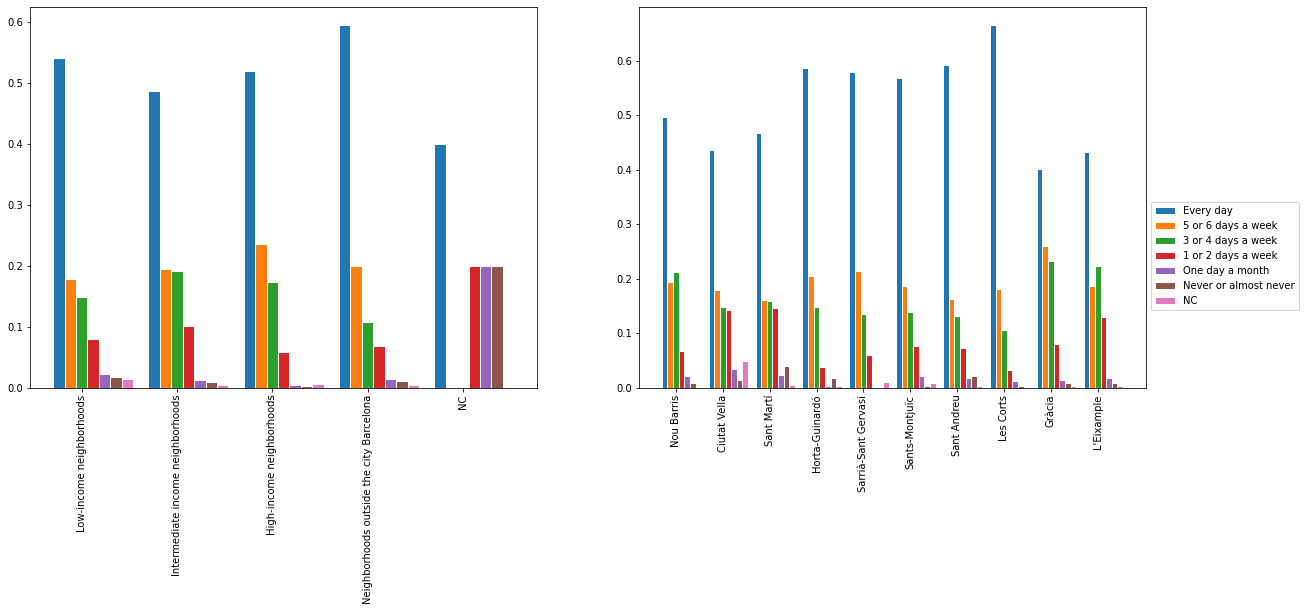

In [ ]:
# Homework/study
plot_Q48('t_deures', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

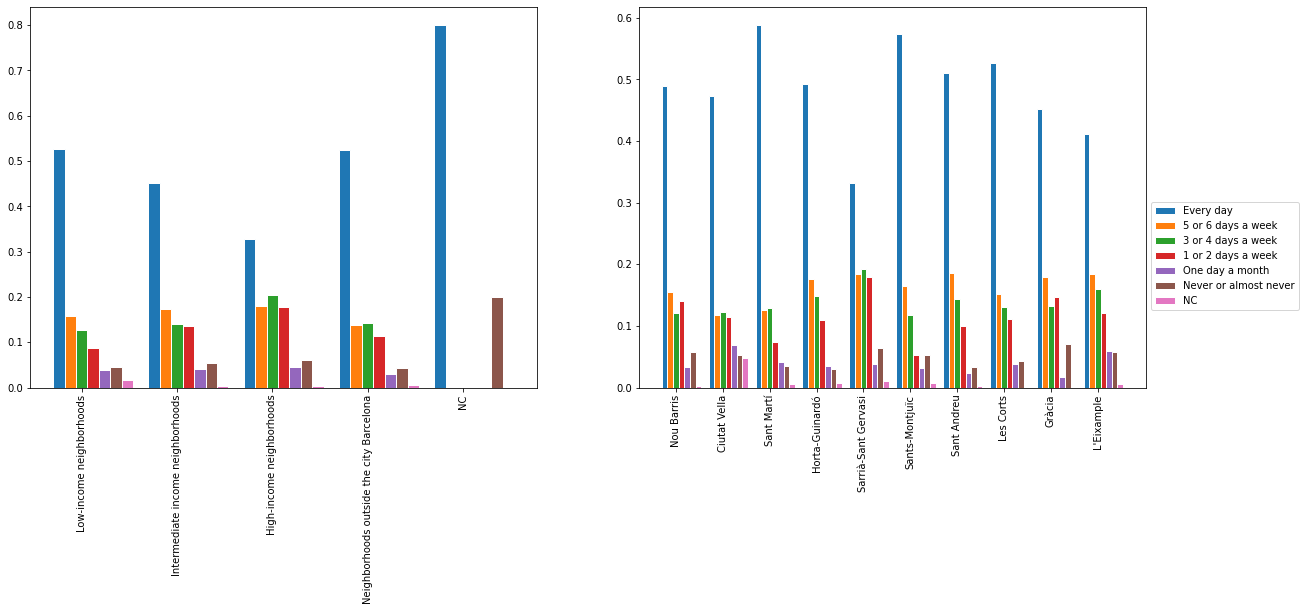

In [ ]:
# Watch TV
plot_Q48('t_tv', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

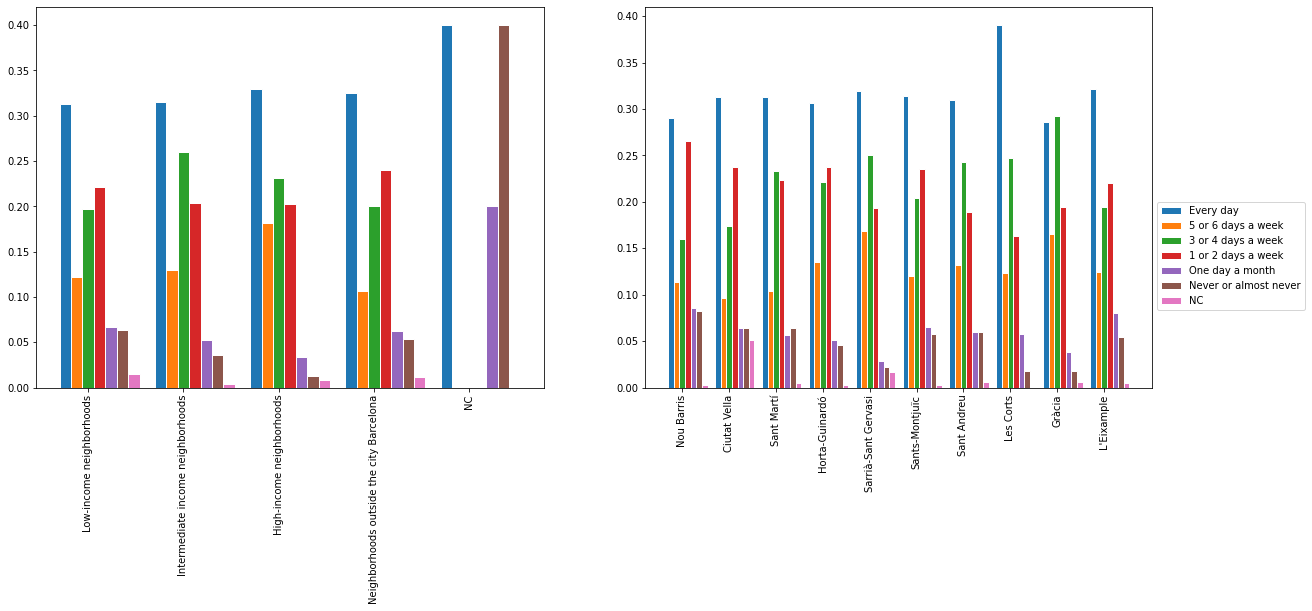

In [ ]:
# Do sports
plot_Q48('t_esport', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

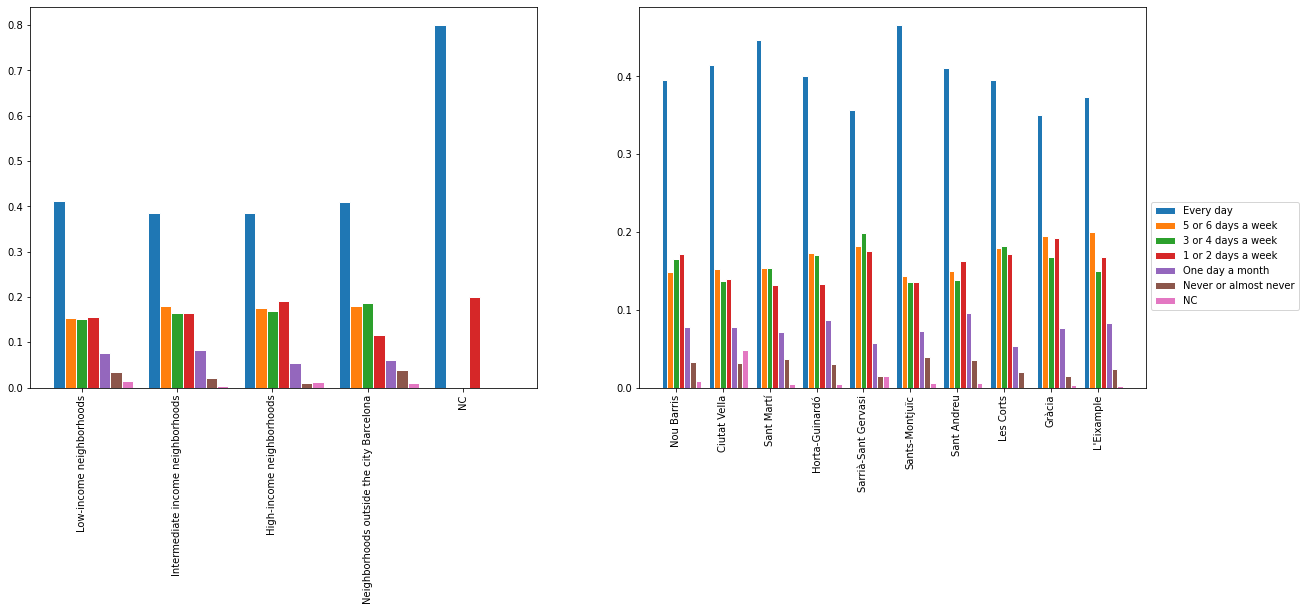

In [ ]:
# Spend time with family and have fun
plot_Q48('t_familia', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

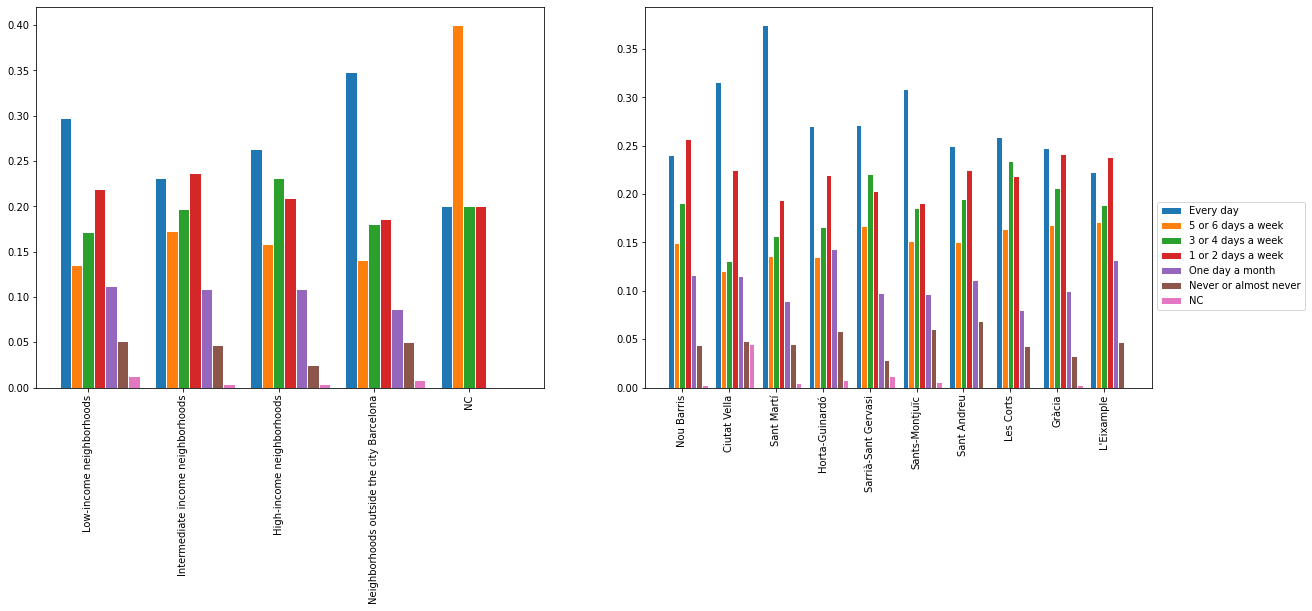

In [ ]:
# Being outdoors
plot_Q48('t_airelliure', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

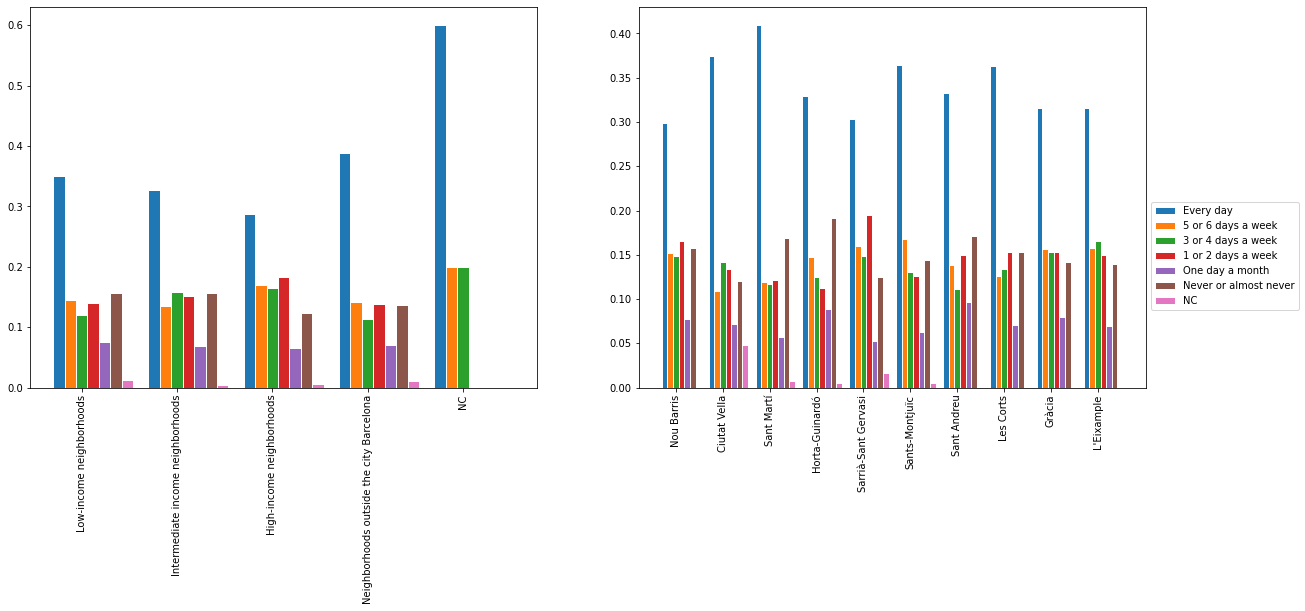

In [ ]:
# Social media
plot_Q48('t_xarxes', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

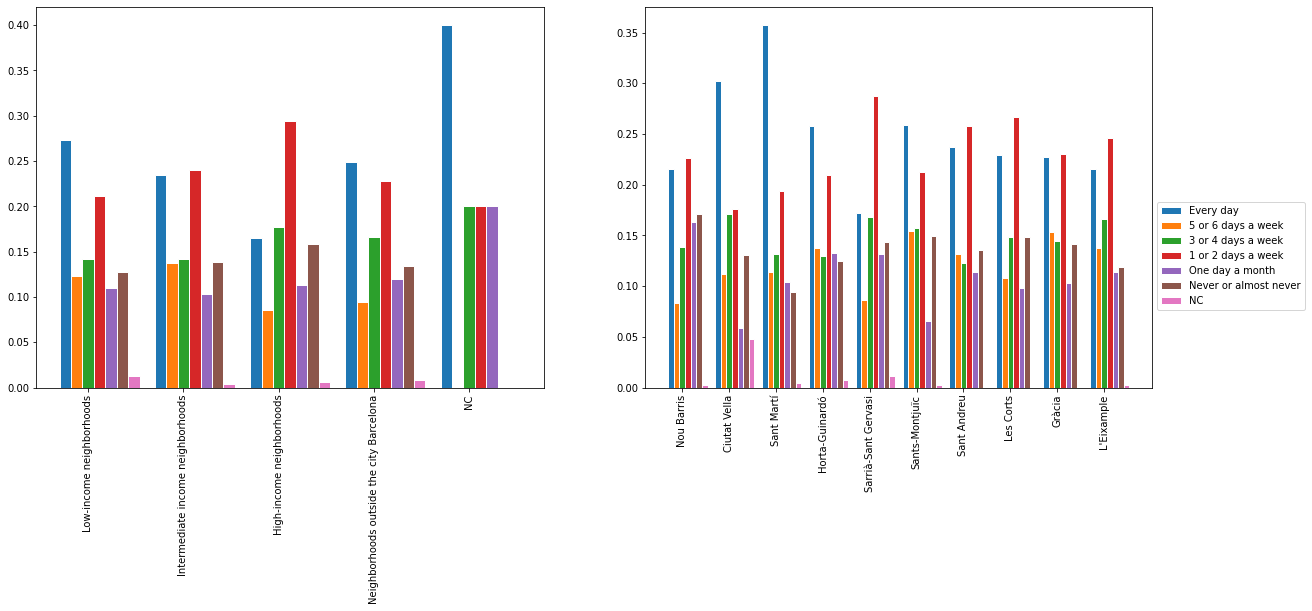

In [ ]:
# Video games
plot_Q48('t_videojocs', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

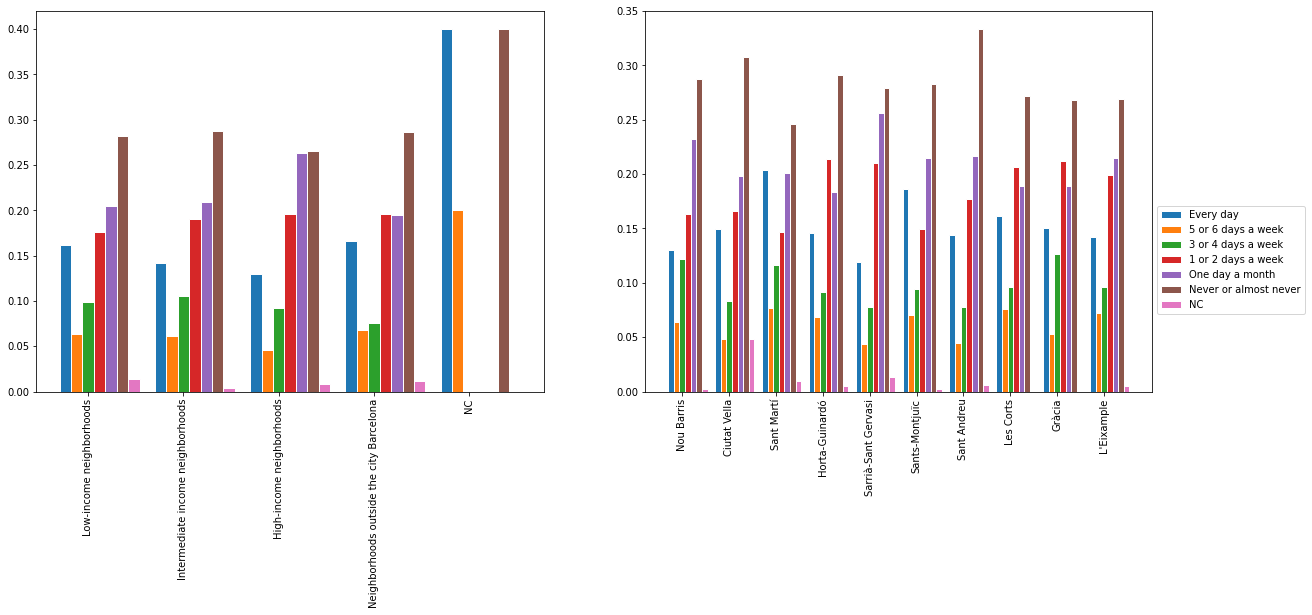

In [ ]:
# Rest/do nothing
plot_Q48('t_resrepos', groups=['ERFDbllp', 'Nom_Districte_Educatiu'])

## Groupby other metrics

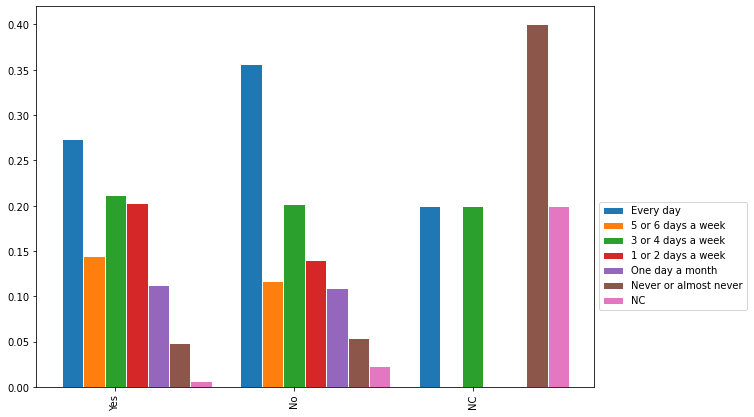

In [ ]:
# Helping at home (housework)
# Group: have internet
plot_Q48('t_ajuda', groups=['bm_internet'])

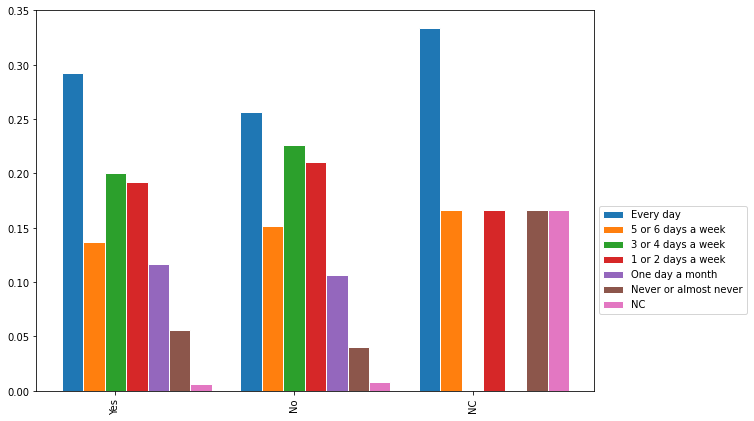

In [ ]:
# Helping at home (housework)
# Group: have mobile
plot_Q48('t_ajuda', groups=['bm_mobil'])

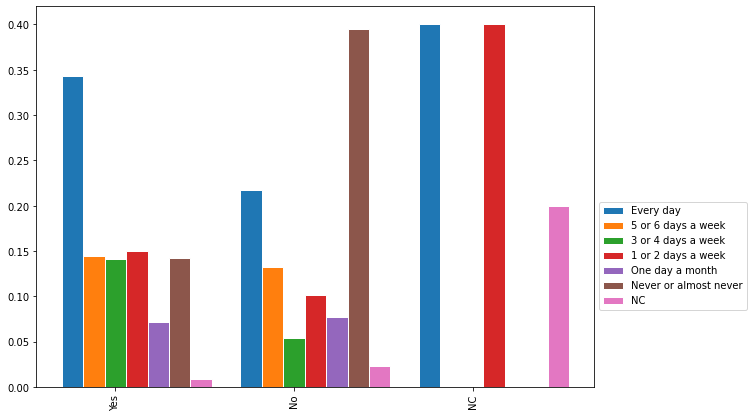

In [ ]:
# Social media
# Group: have internet
plot_Q48('t_xarxes', groups=['bm_internet'])

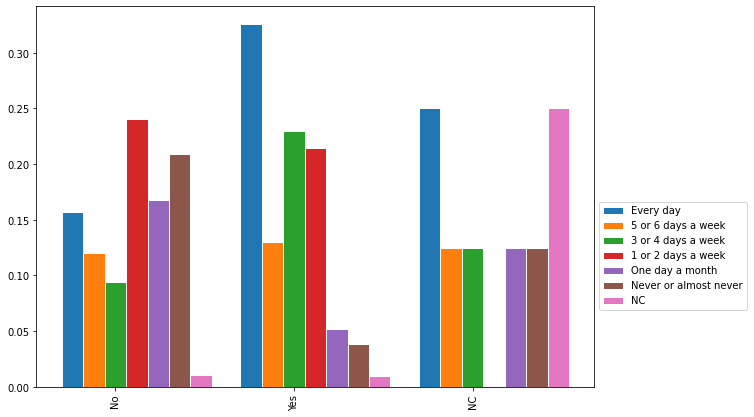

In [ ]:
# sports
# Group: materials for sports/hobbies
plot_Q48('t_esport', groups=['bm_maficions'])

In [ ]:
df_t.head()

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_airelliure,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio,Població,RFD-mean,RFD-std,RFD-sem
0,1,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,5 or 6 days a week,One day a month,1 or 2 days a week,Yes,Yes,166805,51.446154,7.426261,2.059674
1,2,8,Nou Barris,6è,Boy,Yes,Intermediate income neighborhoods,11,I live with my family,Yes,...,One day a month,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week,Yes,I'm not sure,166805,51.446154,7.426261,2.059674
2,3,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,3 or 4 days a week,1 or 2 days a week,Every day,I'm not sure,Yes,166805,51.446154,7.426261,2.059674
3,4,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,Every day,1 or 2 days a week,3 or 4 days a week,Yes,Yes,166805,51.446154,7.426261,2.059674
4,5,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,1 or 2 days a week,One day a month,Never or almost never,Yes,Yes,166805,51.446154,7.426261,2.059674


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>